In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# set the font family and size to use for Matplotlib figures
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
# set params
Lx = 0.01  # length of the plate in the x direction
Ly = 0.01  # height of the plate in the y direction
nx = 21  # number of points in the x direction
ny = 21  # number of points in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction
alpha = 1e-4  # thermal diffusivity of the plate

# define the grid positions
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# initial conditions
Tb = 100.0  # temperature at the left and bottom boundaries
T0 = 20.0 * numpy.ones((ny, nx))
T0[0, :] = Tb
T0[:, 0] = Tb

In [4]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    """
    Computes and returns the temperature distribution after a given number of time 
    steps. Explicit integration using forward differencing in time and central 
    differencing in space, with Neumann conditions (zero-gradient) on top and right
    boundaries and Dirichlet conditions on bottom and left boundaries.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution as a 2D array of floats
    nt : integer
        Maximum number of time steps to compute
    dt : float
        Time-step size.
    dx : float
        Grid spacing in the x direction
    dy : float
        Grid spacing in the y direction
    alpha : float
        Thermal diffusivity
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 2D array of floats
    """
    
    T = T0.copy()
    
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    
    ny, nx = T.shape
    I, J = int(nx / 2), int(ny / 2)  # indices of the center
    
    for n in range(nt):
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                T[j, i] = (T[j, i]
                             + sigma_x * (T[j, i - 1] - 2.0 * T[j, i] + T[j, i + 1])
                             + sigma_y * (T[j - 1, i] - 2.0 * T[j, i] + T[j + 1, i]))
        
        # apply Neumann conditions (zero-gradient)
        T[0, :] = 100.0  # bottom
        T[:, 0] = 100.0  # left
        T[-1, :] = T[-2, :]  # top
        T[:, -1] = T[:, -2]  # right
        
        
        # check if the center of the domain has reached T = 70C
        if T[J, I] >= 70.0:
            break
    print('time step: {} - center at T={:.1f} at t={:.2f} s'.format(n + 1, T[J, I], 
                                                                   (n + 1) * dt))
    
    return T

CFL limits: 
$$
\frac{\alpha \Delta t}{\Delta x^2}=\frac{\alpha \Delta t}{\Delta y^2}=\frac{1}{4}
$$

In [5]:
# set time step size based on CFL limits
sigma = 0.5
dt = sigma * min(dx, dy)**2 / alpha  # time-step size
dt = sigma / (1 / dx**2 + 1 / dy**2) / alpha  # time-step size
nt = 500  # number of time steps to compute

# compute the temp along the rod
T = ftcs(T0, nt, dt, dx, dy, alpha)

time step: 128 - center at T=70.1 at t=0.08 s


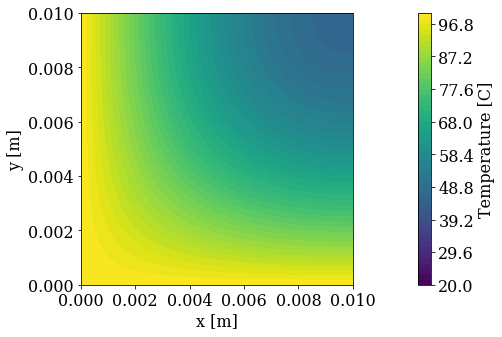

In [6]:
# plot the filled contour of the temp
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x, y, T, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable='box');